<a href="https://colab.research.google.com/github/Sornambal/Cognifyz-Technology-Internship-Level-3/blob/main/Cognifyz_DS_Level_3_(Task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

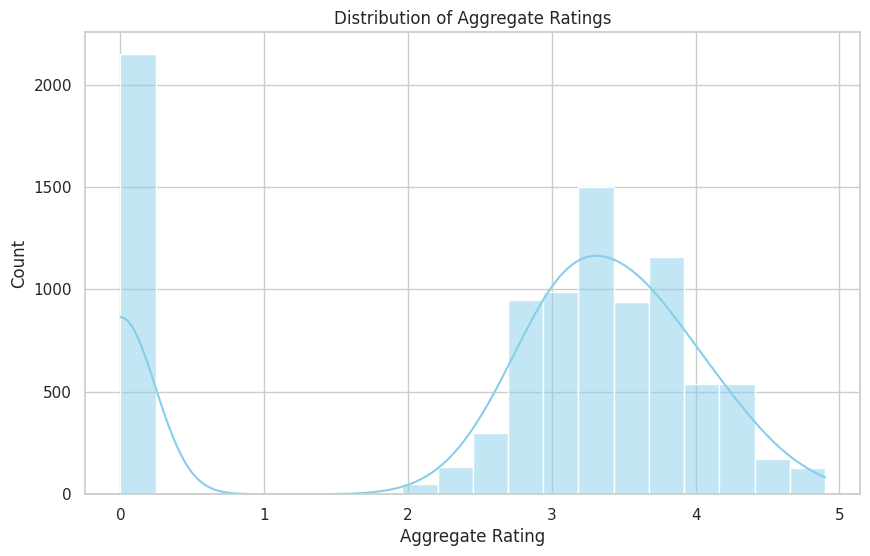

/tmp/ipython-input-1-3280874446.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=df, palette='Set2')


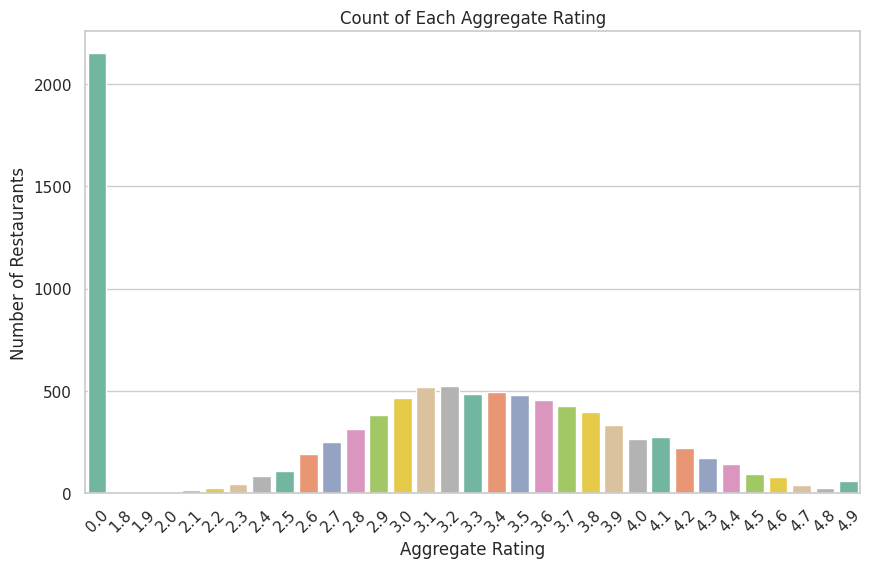

/tmp/ipython-input-1-3280874446.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='YlGnBu')


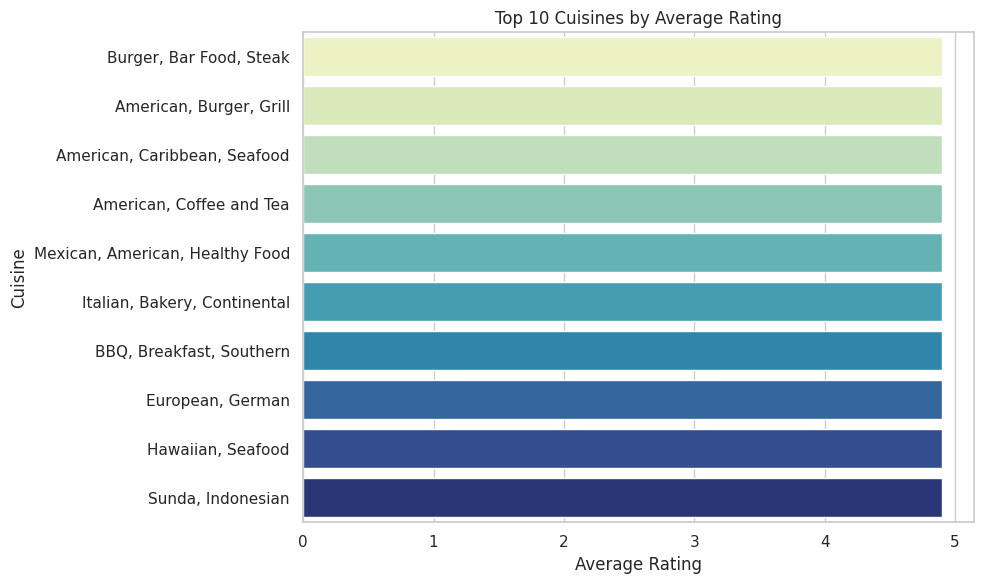

/tmp/ipython-input-1-3280874446.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')


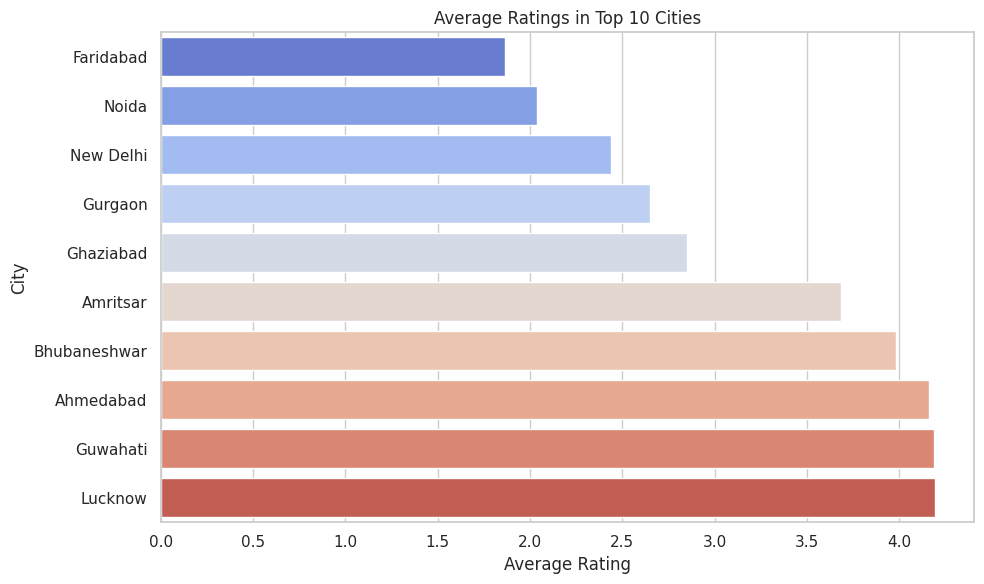

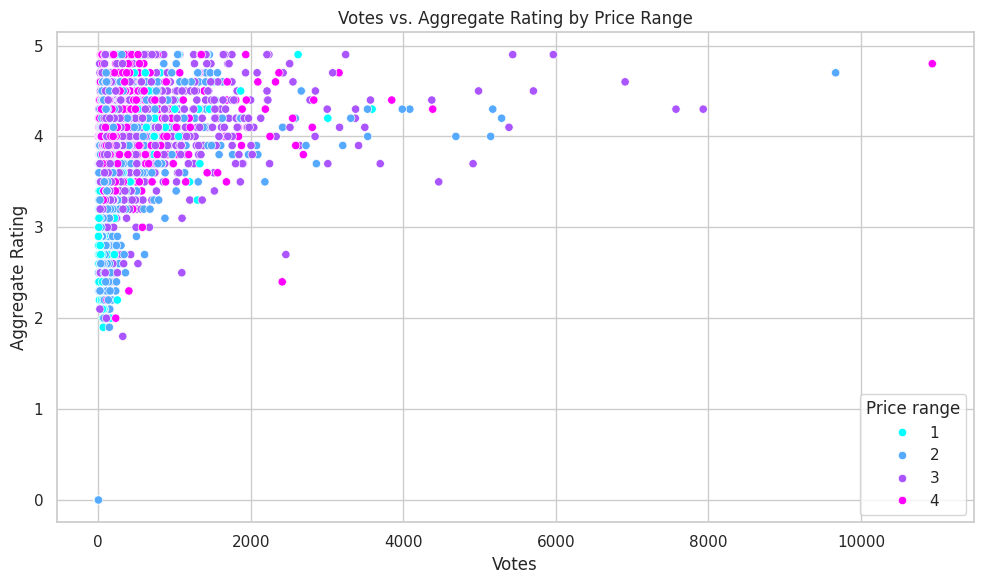

/tmp/ipython-input-1-3280874446.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Accent')


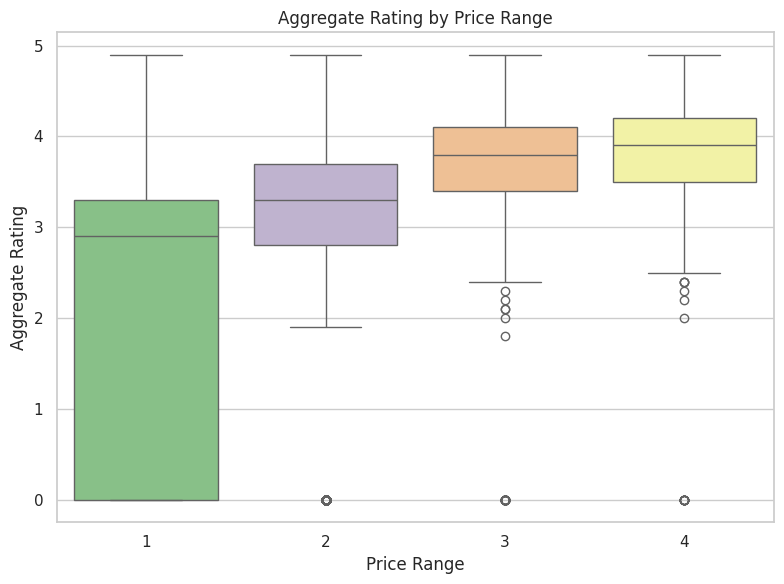

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv('/content/Dataset .csv')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['Aggregate rating', 'Cuisines', 'City'])

# Set visual theme
sns.set(style="whitegrid")

# ----------------------------
# 1. Distribution of Ratings
# ----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df, palette='Set2')
plt.title('Count of Each Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 2. Average Ratings by Cuisine (Top 10)
# ----------------------------
top_cuisines = (
    df.groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='YlGnBu')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Average Ratings by City (Top 10 Cities by Count)
# ----------------------------
top_cities = df['City'].value_counts().head(10).index.tolist()
city_ratings = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_ratings.values, y=city_ratings.index, palette='coolwarm')
plt.title('Average Ratings in Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Relationship: Votes vs Aggregate Rating
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, hue='Price range', palette='cool')
plt.title('Votes vs. Aggregate Rating by Price Range')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Boxplot: Price Range vs Rating
# ----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Accent')
plt.title('Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()
